In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
data = pd.read_json('books_filter.json')
categories = pd.read_json('categories.json')

In [3]:
data.rename(columns={'category': 'subcategory'}, inplace=True)
categories.drop_duplicates(inplace=True)
combined_data = pd.merge(data, categories, on='subcategory', how='left')
combined_data.drop_duplicates(subset=['title'], inplace=True)
combined_data.reset_index(inplace=True)

In [4]:
publisher_counts = combined_data['publisher'].value_counts().head(10)
publisher_counts

publisher
VULKAN IZDAVAŠTVO    2263
LAGUNA               2042
KREATIVNI CENTAR      611
SLUŽBENI GLASNIK      566
AKADEMSKA KNJIGA      417
PČELICA               355
PUBLIK PRAKTIKUM      277
GEOPOETIKA            269
ARHIPELAG             228
ČIGOJA ŠTAMPA         228
Name: count, dtype: int64

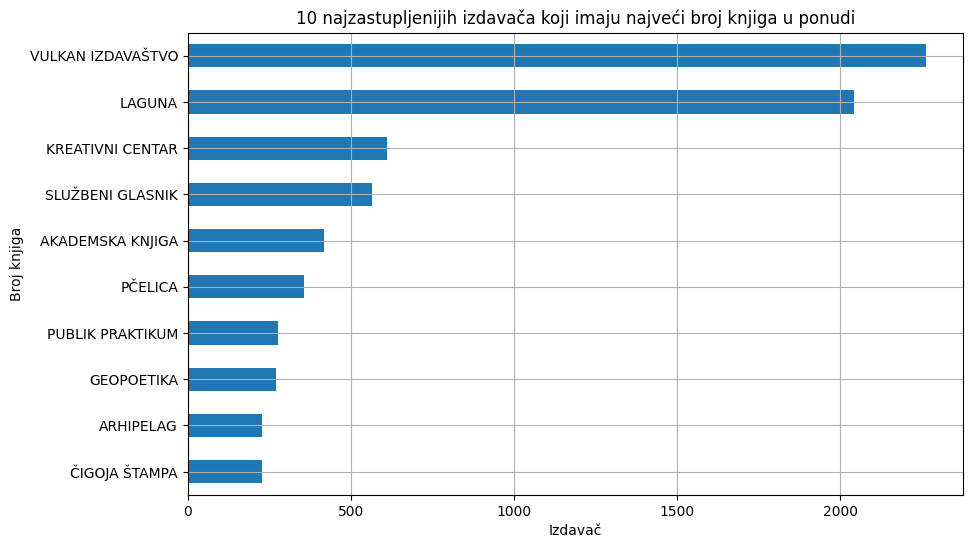

In [5]:
plt.figure(figsize=(10, 6))
publisher_counts.plot(kind='barh')
plt.title('10 najzastupljenijih izdavača koji imaju najveći broj knjiga u ponudi')
plt.xlabel('Izdavač')
plt.ylabel('Broj knjiga')
plt.grid()
plt.gca().invert_yaxis()
plt.show()

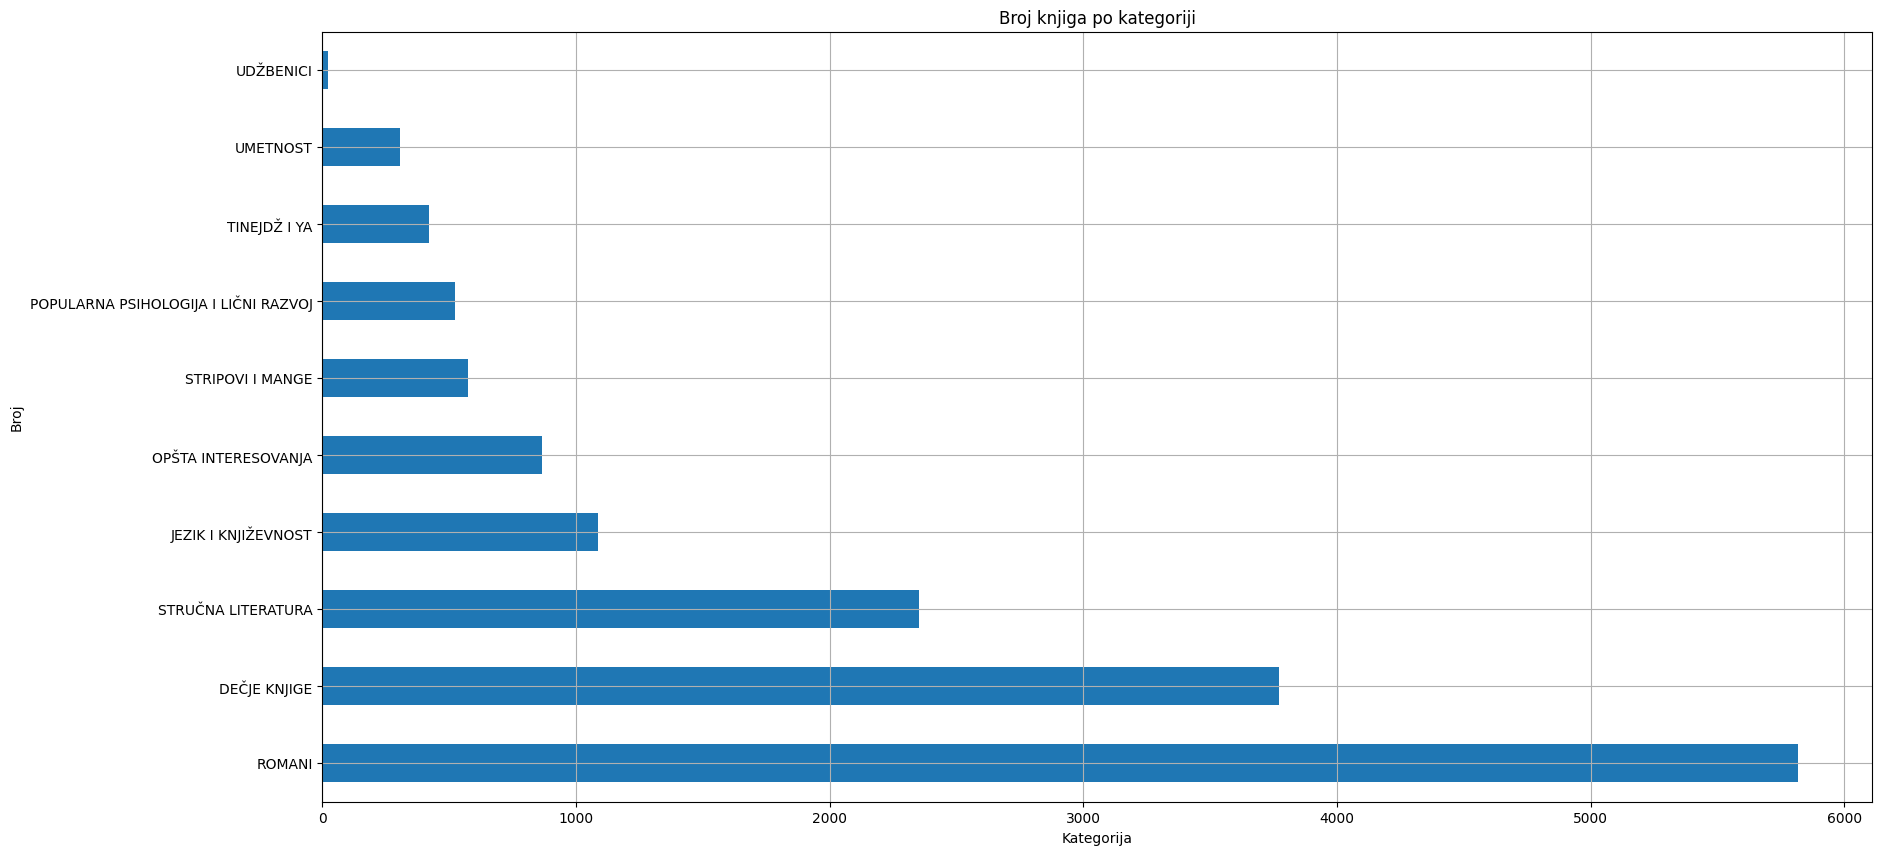

In [6]:
plt.figure(figsize=(20, 10))
combined_data.main_category.value_counts().plot(kind='barh')
plt.xlabel('Kategorija')
plt.grid()
plt.ylabel('Broj')
plt.title('Broj knjiga po kategoriji')
plt.show()

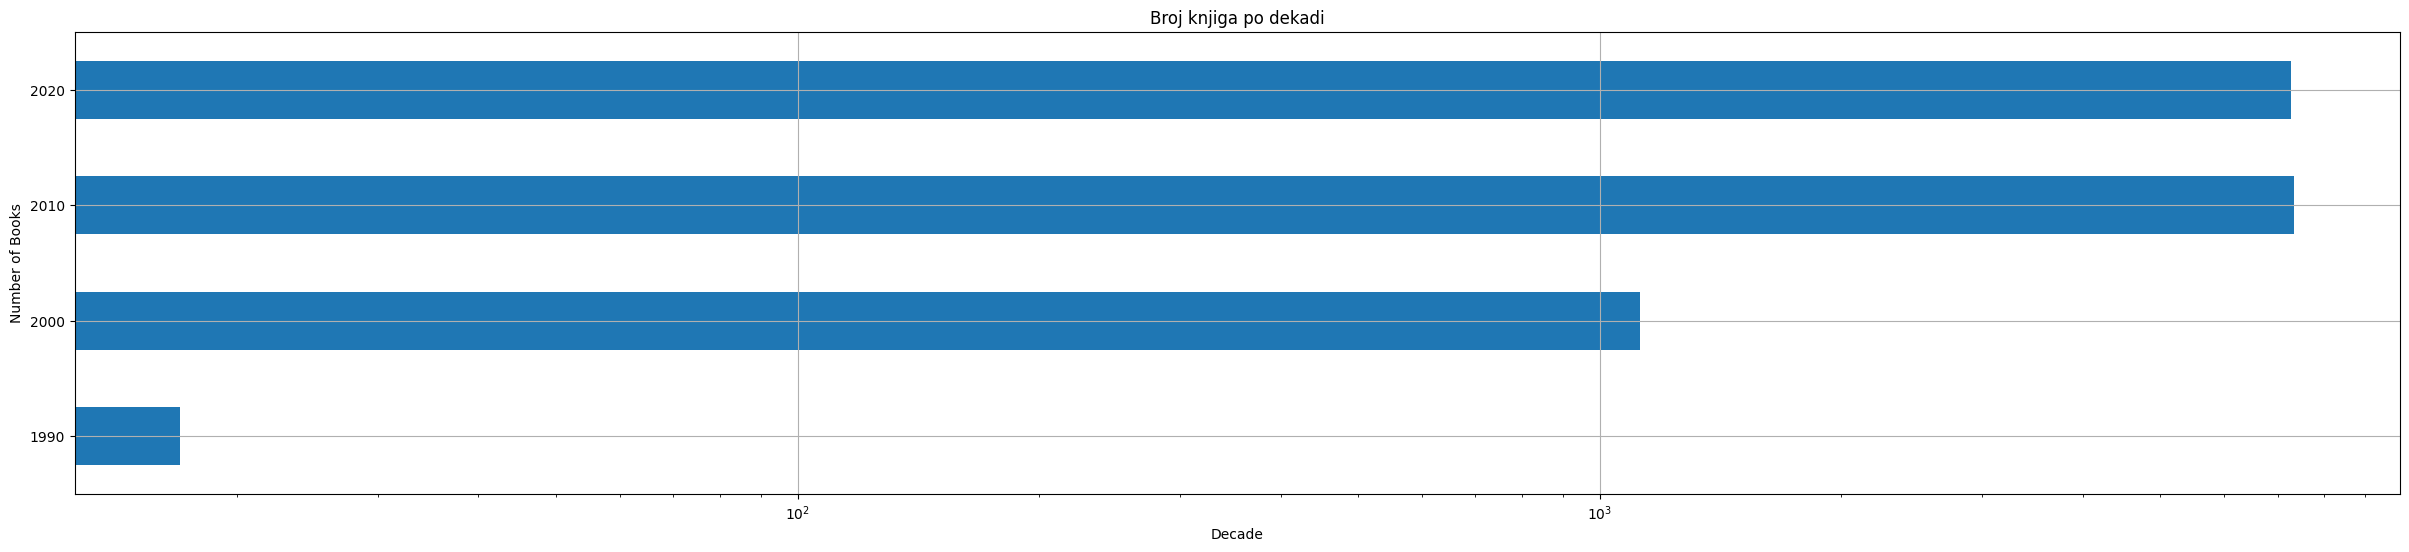

In [7]:
combined_data['decade'] = (combined_data['year'] // 10) * 10

books_per_decade = combined_data['decade'].value_counts().sort_index()

plt.figure(figsize=(30, 6))
books_per_decade.plot(kind='barh')
plt.title('Broj knjiga po dekadi')
plt.xlabel('Decade')
plt.ylabel('Number of Books')
plt.xscale('log')
plt.grid()
plt.show()

In [8]:
combined_data['year'].sort_values

<bound method Series.sort_values of 0        2023
1        2024
2        2024
3        2024
4        2020
         ... 
15739    2010
15740    2003
15741    2004
15742    2006
15743    2010
Name: year, Length: 15744, dtype: int64>

In [9]:
publisher_counts = combined_data['publisher'].value_counts()

top5_publishers = publisher_counts.head(5)

total_books = combined_data.shape[0]

percentages = (top5_publishers / total_books) * 100

top5_stats = pd.DataFrame({
    'number of books': top5_publishers,
    'percentage': percentages
})
top5_stats

,number of books,percentage
publisher,,
VULKAN IZDAVAŠTVO,2263,14.373730
LAGUNA,2042,12.970020
KREATIVNI CENTAR,611,3.880843
SLUŽBENI GLASNIK,566,3.595020
AKADEMSKA KNJIGA,417,2.648628


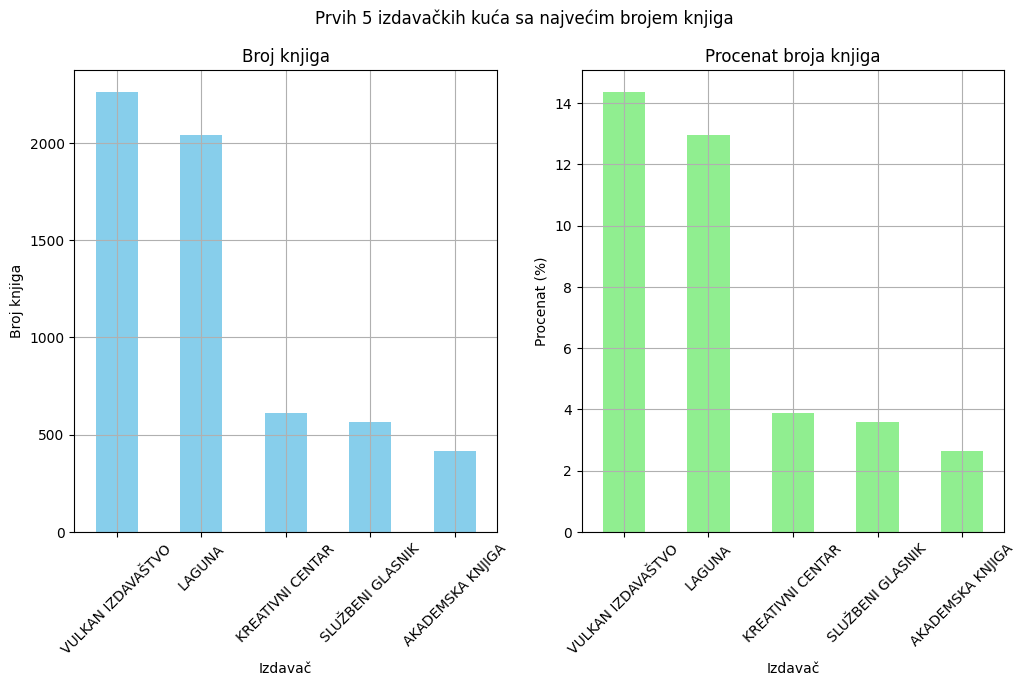

In [10]:
plt.figure(figsize=(12, 6))
plt.suptitle('Prvih 5 izdavačkih kuća sa najvećim brojem knjiga')
plt.subplot(1, 2, 1)
top5_stats['number of books'].plot(kind='bar', color='skyblue')
plt.title('Broj knjiga')
plt.xlabel('Izdavač')
plt.ylabel('Broj knjiga')
plt.xticks(rotation=45)
plt.grid()

plt.subplot(1, 2, 2)
top5_stats['percentage'].plot(kind='bar', color='lightgreen')
plt.title('Procenat broja knjiga')
plt.xlabel('Izdavač')
plt.ylabel('Procenat (%)')
plt.xticks(rotation=45)
plt.grid()

plt.show()

In [11]:
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{:.1f}%\n({:d})'.format(pct, val)
    return my_format

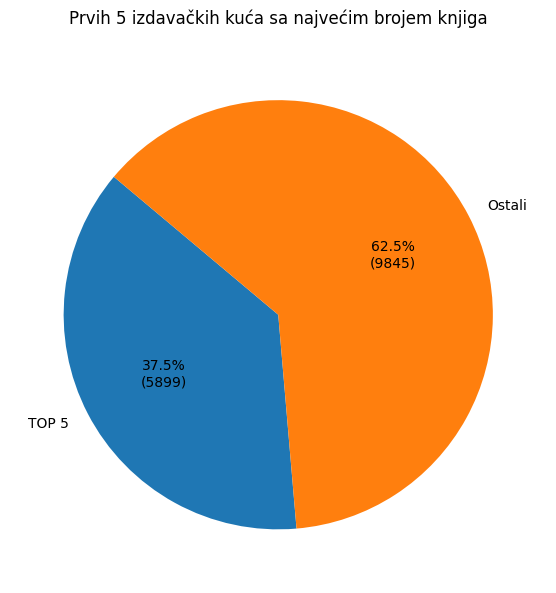

In [12]:
labels = ['TOP 5', 'Ostali']
per = [sum(top5_publishers), total_books - sum(top5_publishers)]

plt.figure(figsize=(12, 6))
plt.suptitle('Prvih 5 izdavačkih kuća sa najvećim brojem knjiga')

plt.pie(per, labels=labels, autopct=autopct_format(per), startangle=140)
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()

plt.show()

In [13]:
combined_data['price']

0         629
1         742
2         673
3         891
4        2673
         ... 
15739     899
15740     770
15741    1100
15742     770
15743     825
Name: price, Length: 15744, dtype: int64

In [14]:
price_ranges = [(0, 500), (500, 1500), (1500, 3000), (3000, 5000), (5000, 10000), (10000, 15000), (15000, float('inf'))]
labels = ['<= 500', '501-1500', '1501-3000', '3001-5000', '5001-10000', '10001-15000', '> 15000']

combined_data['price range'] = pd.cut(combined_data['price'], bins=[x[0] for x in price_ranges] + [float('inf')], labels=labels, right=False)

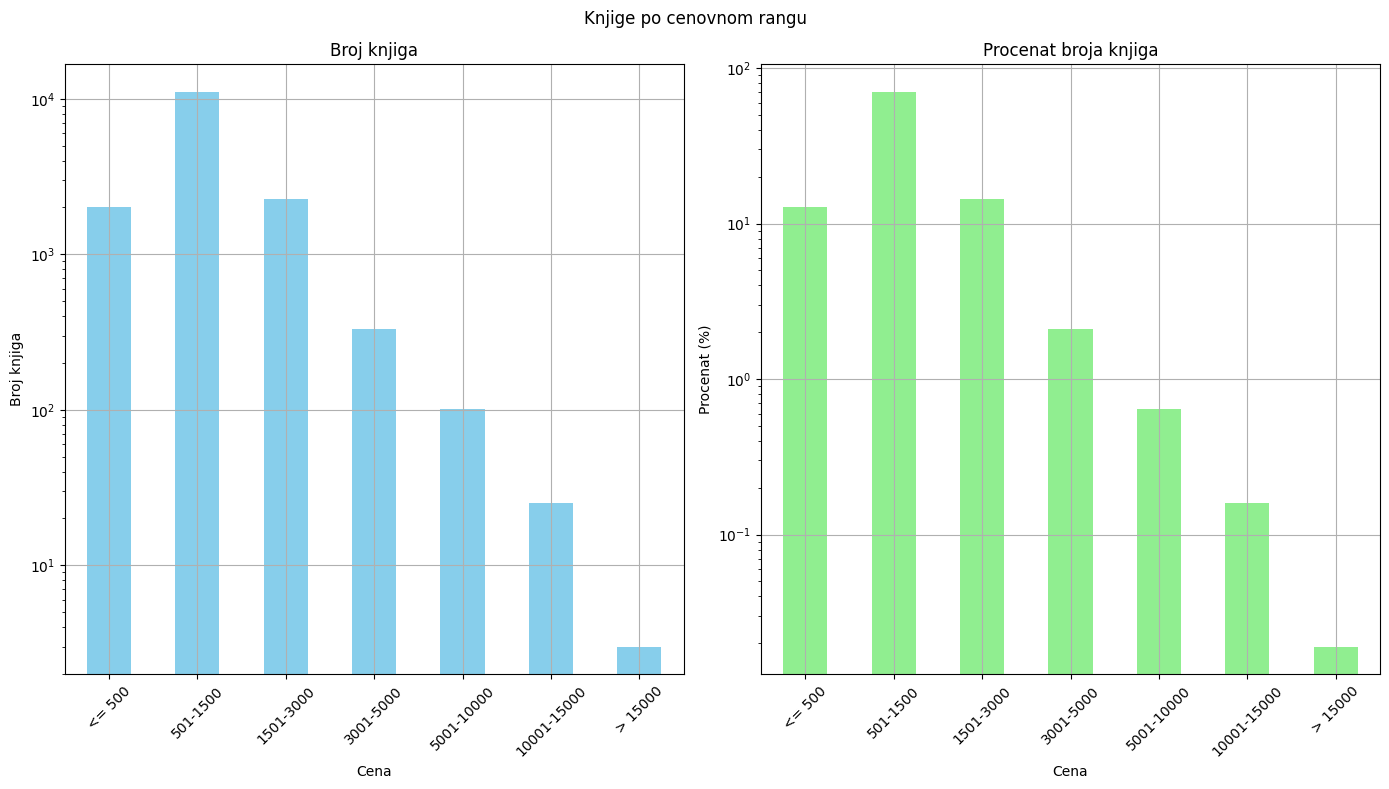

In [15]:
range_counts = combined_data['price range'].value_counts().sort_index()

total_books = combined_data.shape[0]
percentages = (range_counts / total_books) * 100

range_stats = pd.DataFrame({
    'number of books': range_counts,
    'percentage': percentages
})

plt.figure(figsize=(14, 8))
plt.suptitle('Knjige po cenovnom rangu')
plt.subplot(1, 2, 1)
range_stats['number of books'].plot(kind='bar', color='skyblue')
plt.title('Broj knjiga')
plt.xlabel('Cena')
plt.ylabel('Broj knjiga')
plt.yscale('log')
plt.xticks(rotation=45)
plt.grid()

plt.subplot(1, 2, 2)
range_stats['percentage'].plot(kind='bar', color='lightgreen')
plt.title('Procenat broja knjiga')
plt.xlabel('Cena')
plt.ylabel('Procenat (%)')
plt.yscale('log')
plt.xticks(rotation=45)
plt.grid()

plt.tight_layout()
plt.show()

In [16]:
range_counts = combined_data['price range'].value_counts().sort_index()

total_books = combined_data.shape[0]
percentages = (range_counts / total_books) * 100

range_stats = pd.DataFrame({
    'number of books': range_counts,
    'percentage': percentages
})

per = list(range_counts)
per
labels = ['<= 500', '501-1500', '1501-3000', '3001-5000', '5001-10000', '10001-15000', '> 15000']

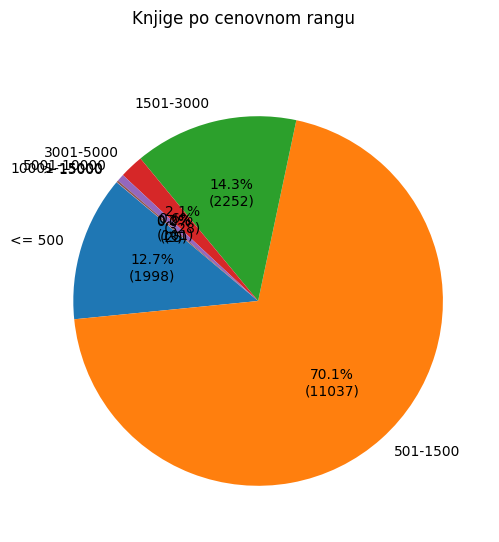

In [18]:
plt.figure(figsize=(12, 6))
plt.suptitle('Knjige po cenovnom rangu')

plt.pie(per, labels=labels, autopct=autopct_format(per), startangle=140)
plt.xticks(rotation=45)
plt.grid()

plt.show()

In [19]:
current_year = pd.Timestamp.now().year
three_years_ago = current_year - 3
recent_books = combined_data[combined_data['year'] > three_years_ago]

total_books = recent_books.shape[0]
hardcover_books = recent_books[recent_books['binding'].str.lower() == 'tvrd'].shape[0]

percentage_hardcover = (hardcover_books / total_books) * 100

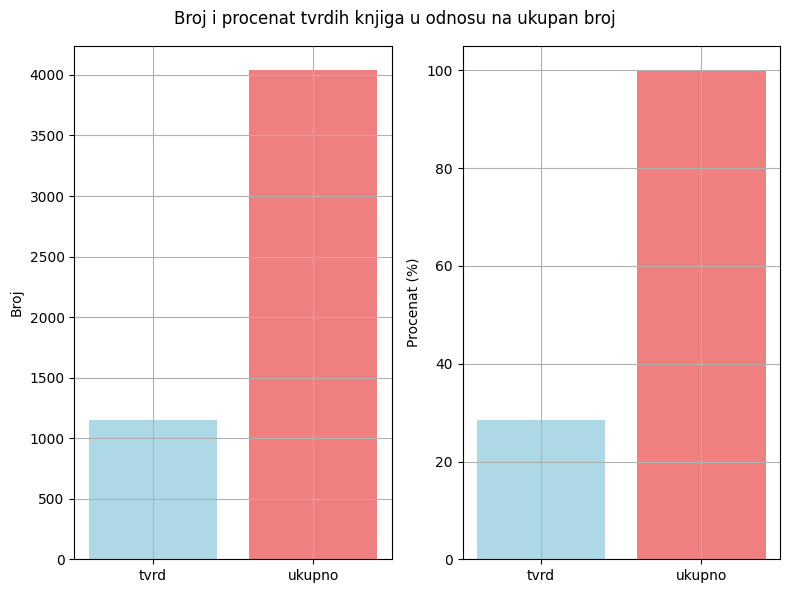

In [20]:
labels = ['tvrd', 'ukupno']
sizes = [hardcover_books, total_books]
percentages = [percentage_hardcover, 100]
colors = ['lightblue', 'lightcoral']

plt.figure(figsize=(8, 6))
plt.suptitle('Broj i procenat tvrdih knjiga u odnosu na ukupan broj')
plt.subplot(1,2,1)
plt.bar(labels, sizes, color=colors)
plt.ylabel('Broj')
plt.grid()

plt.subplot(1,2,2)
plt.bar(labels, percentages, color=colors)
plt.ylabel('Procenat (%)')
plt.grid()

plt.tight_layout()
plt.show()

In [21]:
current_year = pd.Timestamp.now().year
three_years_ago = current_year - 3
recent_books = combined_data[combined_data['year'] > three_years_ago]

hardcover_books = recent_books[recent_books['binding'].str.lower() == 'tvrd'].shape[0]

total_books = recent_books.shape[0]
labels = ['Tvrd', 'Broš']
sizes = [hardcover_books, total_books]

per = [hardcover_books, total_books - hardcover_books]

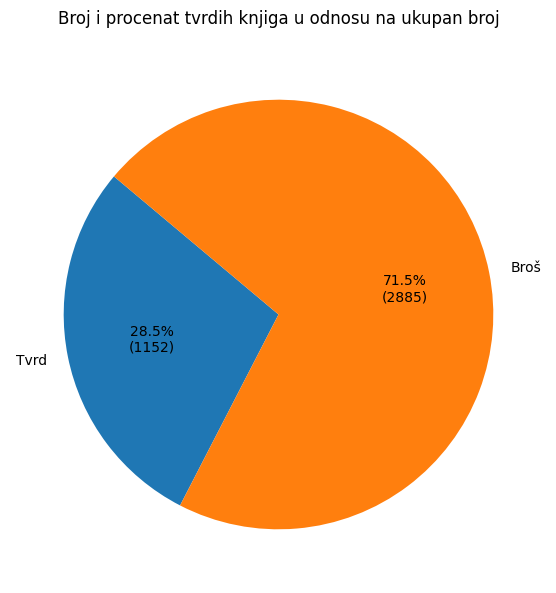

In [22]:
plt.figure(figsize=(12, 6))
plt.suptitle('Broj i procenat tvrdih knjiga u odnosu na ukupan broj')

plt.pie(per, labels=labels, autopct=autopct_format(per), startangle=140)
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()

plt.show()